In [1]:
# Settings
filename    = '/home/axel/ownCloud/documents/Masterarbeit/TPC/rawdata/LED_test_100Hz_1.4V_500ns_512samps_20150729.hdf5'
#filename    = '/home/axel/PycharmProjects/pax/Kr83m_tpc_gaseous_lutz_150522_coin1_th300_6.hdf5'
file_format = 'hfd5'
loglevel    = 'DEBUG'

In [2]:
# Import modules
# We get a log file
#import logging
#log = logging.getLogger('XAMS_analysis')
#log.setLevel(loglevel)
# Notebookloader is needed to import ipython notebooks as python modules.
# Notebookloader prompts a warning, but it seems to work fine
# TODO Perhaps we need to reconsider what functions we actually need and put them in a regular python script?
import NotebookLoader
import Function_definitions as fn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.rc('font', size=16)
import h5py
import units
import math
from recarray_tools import append_fields
import pandas as pd

importing IPython notebook from Function_definitions.ipynb


/home/axel/anaconda3/lib/python3.4/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


In [3]:
f = h5py.File(filename)
events = f.get('Event')[:]
peaks = f.get('Peak')[:]
pulses = f.get('Pulse')[:]
hits = f.get("Hit")[:]
f.close()

In [4]:
hits_by_channel = fn.group_by(hits, "channel")

/home/axel/anaconda3/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


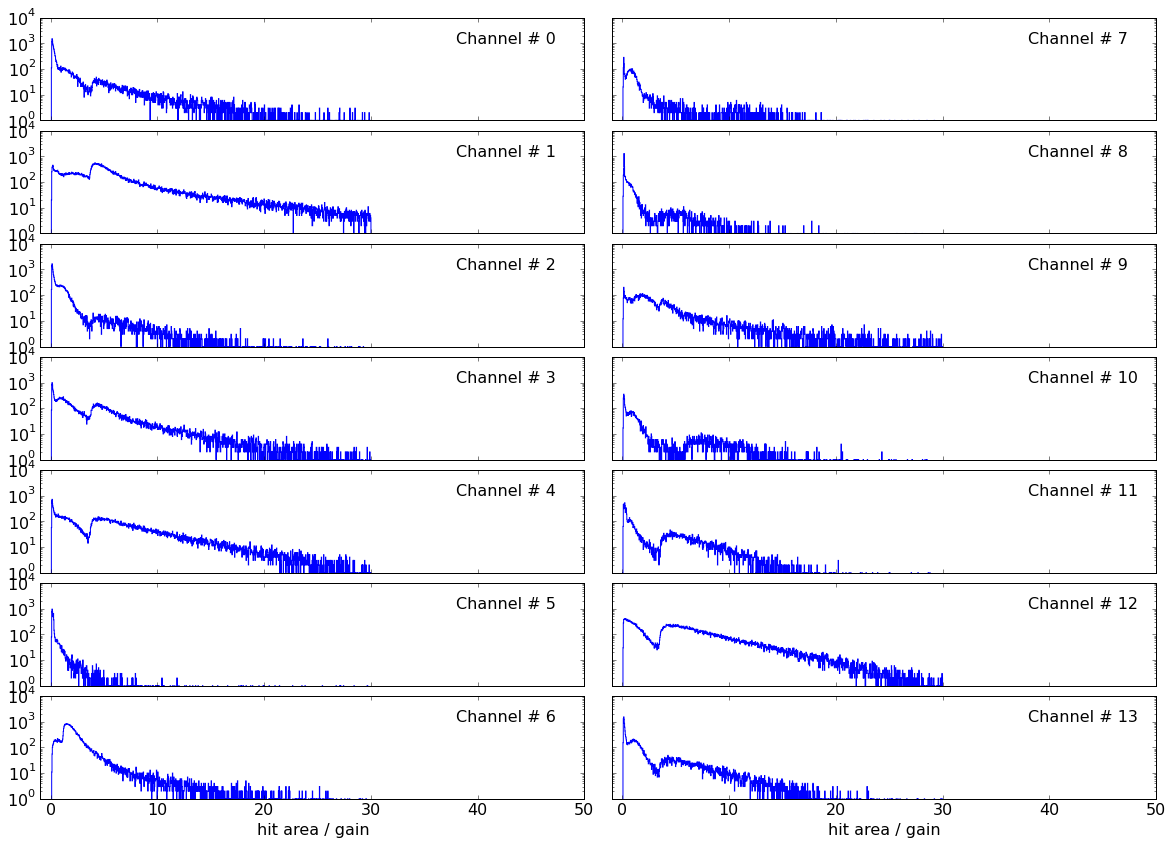

In [24]:
fig, ax = plt.subplots(nrows=7, ncols=2, sharex= True, sharey = True, squeeze=False,figsize=(20,14))
plt.subplots_adjust(hspace=0.1, wspace = 0.05)
ax[6][0].set_xlabel(r"hit area / gain")
ax[6][1].set_xlabel(r"hit area / gain")

for xi in range(7):
        ax[xi][0].set_xlim(-1,50)
        ax[xi][0].set_yscale("log")
        #ax[xi][yi].set_ylim(0,10000)
        ax[xi][0].hist([xhits["area"] for xhits in hits if (xhits["channel"] == xi)],
                            range=(0,30),
                            bins=1000,
                            histtype="step")
        ax[xi][0].text(38,1000,"Channel # %i"%xi)
for xi in range(7,14):
        ax[xi-7][1].set_xlim(-1,50)
        ax[xi-7][1].set_yscale("log")
        #ax[xi][yi].set_ylim(0,10000)
        ax[xi-7][1].hist([xhits["area"] for xhits in hits if (xhits["channel"] == xi)],
                            range=(0,30),
                            bins=1000,
                            histtype="step")
        ax[xi-7][1].text(38,1000,"Channel # %i"%(xi))
fig.show()
fig.savefig("GainCalibration.pdf")

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [z for z in x if z%2 ==0]
y

In [4]:
df = pd.DataFrame(pulses)

In [5]:
df.baseline

0           130.975006
1           137.699997
2          -111.800003
3          -113.025002
4          -103.125000
5          -108.474998
6           -86.925003
7           -60.049999
8           -42.375000
9            73.375000
10           74.050003
11         -150.675003
12         -150.024994
13           78.750000
14           69.349998
15           78.974998
16           55.674999
17          142.925003
18           86.900002
19          131.324997
20          140.000000
21         -110.974998
22         -101.425003
23         -109.925003
24          -86.675003
25           43.900002
26          -61.799999
27           73.699997
28         -150.175003
29         -153.500000
               ...    
10025542     74.925003
10025543     75.050003
10025544   -150.350006
10025545   -148.600006
10025546     82.224998
10025547     81.474998
10025548     85.599998
10025549     81.800003
10025550     79.349998
10025551     79.375000
10025552     88.925003
10025553     88.675003
10025554   

In [17]:
plt.Axes.text?